In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

In [2]:
#!pip install folium

### Maps with `folium`

Making a map: 

```python
folium.Map()
```

In [3]:
#make map


Typically, we want to center the map at a given latitude and longitude pair so we include the `location` argument with a specific latitude and longitude.  Often, we get this information from a dataset, so let's load in a dataset that describes some community garden locations in New York City.

In [4]:
#read in the data
gardens = pd.read_json('https://data.cityofnewyork.us/resource/ajxm-kzmj.json')

In [5]:
#note the latitude and longitude columns
gardens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   propid            536 non-null    object 
 1   boro              536 non-null    object 
 2   community_board   536 non-null    object 
 3   council_district  495 non-null    float64
 4   garden_name       536 non-null    object 
 5   address           535 non-null    object 
 6   size              536 non-null    object 
 7   jurisdiction      536 non-null    object 
 8   neighborhoodname  323 non-null    object 
 9   cross_streets     464 non-null    object 
 10  latitude          429 non-null    float64
 11  longitude         429 non-null    float64
 12  postcode          431 non-null    object 
 13  census_tract      429 non-null    float64
 14  bin               431 non-null    object 
 15  bbl               431 non-null    object 
 16  nta               431 non-null    object 
dt

In [6]:
#take a peek


In [7]:
#grab first latitude, longitude pair

#create map centered at this latitude and longitude


In [8]:
#display the map


### Adding Markers

There are a few variations of markers that we can add to the map, but they mostly function the same way.  We say a point where we want the marker drawn, define any kind of popup, and add the marker to our map.

### Adding Many Markers

One approach to add markers for all the gardens would be to iterate over the rows of the data, grab each latitude and longitude pair, and add a marker there with any additional information we need.  We can use the `.iterrows()` function from pandas to do so.  Here, we have both the row name and the data from the rows accessible.

In [9]:
#.iterrows()


### Policing Map

In [10]:
c = pd.read_csv('data/sf_police.zip', compression = 'zip')

In [11]:
c.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [12]:
#what kinds of crimes are there
c['Category'].value_counts(ascending=True)

TREA                               3
PORNOGRAPHY/OBSCENE MAT            4
GAMBLING                          20
BAD CHECKS                        34
SEX OFFENSES, NON FORCIBLE        40
LOITERING                         42
FAMILY OFFENSES                   53
EXTORTION                         60
BRIBERY                           66
SUICIDE                           69
RUNAWAY                          140
LIQUOR LAWS                      156
EMBEZZLEMENT                     168
KIDNAPPING                       257
ARSON                            286
DRIVING UNDER THE INFLUENCE      378
DRUNKENNESS                      465
FORGERY/COUNTERFEITING           619
PROSTITUTION                     641
DISORDERLY CONDUCT               658
RECOVERED VEHICLE                736
STOLEN PROPERTY                  882
SEX OFFENSES, FORCIBLE           940
WEAPON LAWS                     1658
TRESPASS                        1812
SECONDARY CODES                 1841
FRAUD                           2635
R

In [13]:
#limit the data to a given crime


### Heat Map

In [14]:
from folium.plugins import HeatMap, MarkerCluster

### Example: Earthquakes in Japan



Make a map of the earthquakes in Japan with magnitude greater than 6.5.  Include information about the earthquake in a popup marker.

In [15]:
japan = pd.read_csv('data/japan_earthquakes.csv')

In [16]:
japan.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-11-27T14:34:20.900Z,48.3780,154.9620,35.00,4.9,mb,NaN,92.0,5.044,0.63,...,2018-11-27T16:06:33.040Z,"269km SSW of Severo-Kuril'sk, Russia",earthquake,7.6,1.7,0.036,248.0,reviewed,us,us
1,2018-11-26T23:33:50.630Z,36.0733,139.7830,48.82,4.8,mww,NaN,113.0,1.359,1.13,...,2018-11-27T16:44:22.223Z,"3km SSW of Sakai, Japan",earthquake,6.0,6.1,0.071,19.0,reviewed,us,us
2,2018-11-26T13:04:02.250Z,38.8576,141.8384,50.56,4.5,mb,NaN,145.0,1.286,0.84,...,2018-11-26T23:52:21.074Z,"26km SSE of Ofunato, Japan",earthquake,8.4,9.5,0.156,12.0,reviewed,us,us
3,2018-11-26T05:20:16.440Z,50.0727,156.1420,66.34,4.6,mb,NaN,128.0,3.191,0.62,...,2018-11-26T08:13:58.040Z,"67km S of Severo-Kuril'sk, Russia",earthquake,9.7,7.8,0.045,151.0,reviewed,us,us
4,2018-11-25T09:19:05.010Z,33.9500,134.4942,38.19,4.6,mb,NaN,104.0,0.558,0.61,...,2018-11-25T23:24:52.615Z,"9km SW of Komatsushima, Japan",earthquake,3.4,10.1,0.132,17.0,reviewed,us,us


<AxesSubplot:>

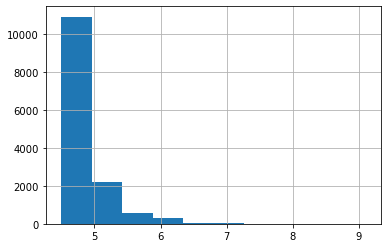

In [17]:
japan['mag'].hist()